In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sn

%matplotlib inline

In [42]:
data=pd.read_csv('fmnist.csv')


<h1>Loading data</h1>
<h2>You can select</h2>
<lu>
    <li>Amount of intances with intances_n</li>
       <li>Amount of classes with Classes_</li>
    
</lu>


In [43]:
intances_n=6000
X = data.iloc[0:intances_n,1:].values
Y = data.iloc[0:intances_n,0].values
print(X.shape)
print(Y)

classes_a=[3,4,5]
classes=np.where((Y==classes_a[0])|(Y==classes_a[1])|(Y==classes_a[2]))
x_class=X[classes]
y_class=Y[classes]
##for selecting different classes
##just put x_class and y_class variables in train_test_split instead of X and Y
##changing classes also effect the PCA results


(6000, 784)
[2 9 6 ... 5 7 3]


In [44]:
##Change test_size for different results
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=3)

<h1>Fitting model</h1>

In [45]:
##change activation function,solver,hidden_layer_sizes,max_iter and learning rate for different results
## N represent the number of neurons in each later   hidden_layer_size(N,N,N.....) ie
##ie hidden_layer_size(20,20) represents two layers with 20 neurons


activation="tanh"##activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
solver="sgd"##  solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
max_iter=200 ##max_iterint, default=200 note:increasing max iter can take longer time to proccess
learning_rate_init=0.001
nn=MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=(30),random_state=1,
max_iter=max_iter,learning_rate_init=learning_rate_init)
nn.fit(x_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

<h1>Predicting and accuracy results</h1>

real Coat
predicted Coat


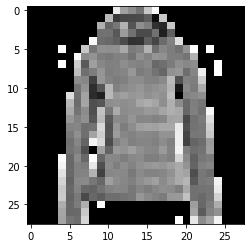

real  Shirt
predicted  Shirt


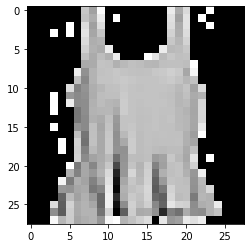

real Bag
predicted Bag


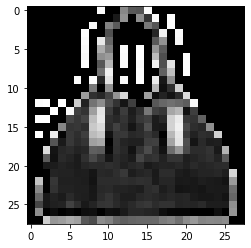

real Coat
predicted Coat


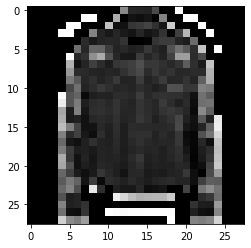

real T-shirt/top
predicted T-shirt/top


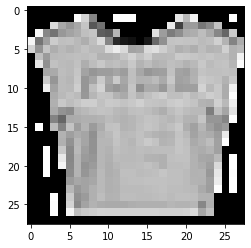

[[107   2   1  10   1   0   3   0   0   0]
 [  1 109   2   1   0   0   0   0   0   0]
 [  3   1  22   0  27   0  71   0   2   0]
 [  8   6   0  98   5   0   0   0   0   0]
 [  1   1   4   5  64   0  44   0   1   0]
 [  1   0   0   0   0 104   0   3   0  12]
 [ 29   1   5  11   5   0  80   0   0   0]
 [  0   0   0   0   0  31   0  79   0   9]
 [  0   0   0   1   4   1   5   0 107   0]
 [  0   0   0   0   0   3   0   4   0 105]]


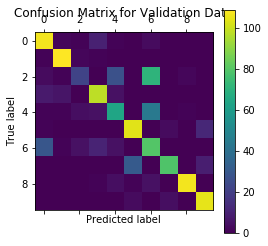

In [46]:
pred=nn.predict(x_test)
labels=["T-shirt/top","Trouser","Pullover"," Dress","Coat","Sandal"," Shirt"," Sneaker", "Bag", 
        "Ankle boot"]
accuracy=accuracy_score(y_test,pred)
numberof_images_display=5
n= np.random.randint(0,len(x_test),numberof_images_display)
for i in n:
    two_d = (np.reshape(x_test[i], (28, 28)) * 255).astype(np.uint8)
   
    print("real",labels[y_test[i]],)
    print("predicted",labels[pred[i]])
                                                
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()
    
    
confusionmatrix=confusion_matrix(y_test,pred)


plt.matshow(confusionmatrix)
print(confusionmatrix)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




In [47]:
print(accuracy)

0.7291666666666666


<h1>Running PCA in Dataset</h1>

In [48]:
##change number of dimentions also for getting different results
N_dimentions=30
pca = PCA(n_components=N_dimentions, svd_solver='randomized',
          whiten=True).fit(x_train)


x_train_pca = pca.transform(x_train)
x_test_pca=pca.transform(x_test)


<h1>Fitting model with PCA results</h1>

In [49]:
##change activation function,solver,hidden_layer_sizes,max_iter and learning rate for different results
## N represent the number of neurons in each later   hidden_layer_size(N,N,N.....) ie
##ie hidden_layer_size(20,20) represents two layers with 20 neurons


activation="tanh"##activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
solver="sgd"##  solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
max_iter=200 ##max_iterint, default=200 note:increasing max iter can take longer time to proccess
learning_rate_init=0.001
nn=MLPClassifier(activation=activation,solver=solver,hidden_layer_sizes=(30),random_state=1,
max_iter=max_iter,learning_rate_init=learning_rate_init)
nn.fit(x_train_pca,y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

<h1>Predicting and accuracy results with PCA included</h1>

real  Shirt
predicted Bag


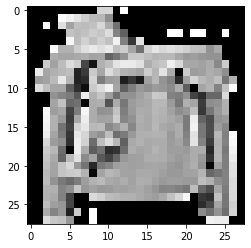

real  Shirt
predicted  Shirt


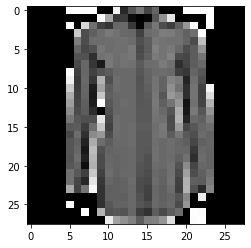

real Sandal
predicted Sandal


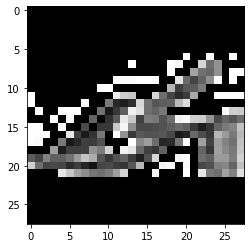

real T-shirt/top
predicted T-shirt/top


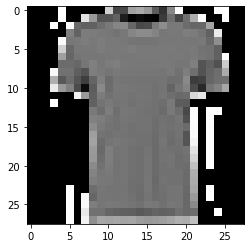

real Bag
predicted Bag


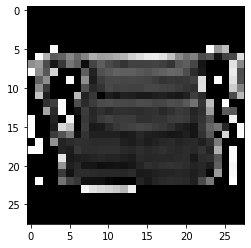

[[107   1   1   9   0   1   4   0   1   0]
 [  0 108   2   3   0   0   0   0   0   0]
 [  2   0  82   2  18   1  18   0   3   0]
 [  7   4   0 101   5   0   0   0   0   0]
 [  0   0   3   6  94   0  16   0   1   0]
 [  0   0   0   0   0 105   0   9   2   4]
 [ 27   0  11  10   9   1  67   0   6   0]
 [  0   0   0   0   0  13   0  97   1   8]
 [  0   0   2   1   0   0   1   0 114   0]
 [  0   0   0   0   0   2   0   4   0 106]]


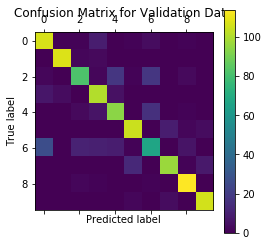

In [50]:

pred=nn.predict(x_test_pca)
labels=["T-shirt/top","Trouser","Pullover"," Dress","Coat","Sandal"," Shirt"," Sneaker", "Bag", 
        "Ankle boot"]
accuracy=accuracy_score(y_test,pred)
numberof_images_display=5
n= np.random.randint(0,len(x_test),numberof_images_display)
for i in n:
    two_d = (np.reshape(x_test[i], (28, 28)) * 255).astype(np.uint8)
   
    print("real",labels[y_test[i]],)
    print("predicted",labels[pred[i]])
                                                
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()
    
    
confusionmatrix=confusion_matrix(y_test,pred)

plt.matshow(confusionmatrix)
print(confusionmatrix)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##print(len(nn.coefs_))
##print(len(nn.coefs_[1]))
#print(nn.coefs_)





In [51]:
print("Accuracy",accuracy)

Accuracy 0.8175
